 ##### <div style="color:white;background-color:lightblue;padding:3%;border-radius:150px 150px;font-size:2em;text-align:center">Youtube EDA</div>

**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
folder_path = 'E:/Intern Dataset/'
all_dataframes = []
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            df = pd.read_csv(file_path, encoding='ISO-8859-1')
        all_dataframes.append(df)

In [2]:
import glob
import os
path = "E:/Intern Dataset/"
csv_files = glob.glob(os.path.join(path, "*.csv"))
json_files = glob.glob(os.path.join(path, "*.json"))

In [3]:
def Concatenator(files):
    data_frames = []
    data_columns = []
    for df in files:
        data = pd.read_csv(df, encoding = 'ISO-8859-1') 
        file_name = df.split("\\")[-1]
        data['country'] = "".join([c for c in file_name if c.isupper() == True])
        data_frames.append(data)
        data_columns.append(data.shape[1])
    if len(set(data_columns)) == 1: 
        result = pd.concat(data_frames, ignore_index = True)
        return result
    else:
        print("Columns counts are not equal!")

In [4]:
all_data = Concatenator(csv_files)

In [5]:
all_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA


Channel categories are presented as ID and that is not informative. Let's get categories from json files and map them by ID in main data.

**DATA CLEANING**

In [6]:
def Get_Categories(json_files):
    categories_dict = {}
    for file in json_files:
        json_file = pd.read_json(file)
        for item in json_file['items']:
            categories_dict[item['id']] = item['snippet']['title']
    return categories_dict

In [7]:
categories_dict = Get_Categories(json_files)

In [8]:
all_data['category_id'] = all_data['category_id'].astype(str)
all_data['category'] = all_data['category_id'].map(categories_dict)

In [9]:
all_data['publish_time'] = pd.to_datetime(all_data['publish_time'])
all_data['publish_date'] = all_data['publish_time'].dt.date
all_data['trending_date'] = pd.to_datetime(all_data['trending_date'], format = "%y.%d.%m")

In [10]:
idx_rows = all_data.groupby(['country', 'video_id'])['trending_date'].idxmax()
all_data = all_data.loc[idx_rows]

**EXPLORATORY DATA ANALYSIS**

In [11]:
all_data.shape

(207148, 19)

In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207148 entries, 40319 to 351552
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   video_id                207148 non-null  object             
 1   trending_date           207148 non-null  datetime64[ns]     
 2   title                   207148 non-null  object             
 3   channel_title           207148 non-null  object             
 4   category_id             207148 non-null  object             
 5   publish_time            207148 non-null  datetime64[ns, UTC]
 6   tags                    207148 non-null  object             
 7   views                   207148 non-null  int64              
 8   likes                   207148 non-null  int64              
 9   dislikes                207148 non-null  int64              
 10  comment_count           207148 non-null  int64              
 11  thumbnail_link          207

In [13]:
all_data.describe()

,trending_date,views,likes,dislikes,comment_count
count,207148,2.071480e+05,2.071480e+05,2.071480e+05,2.071480e+05
mean,2018-02-28 11:38:00.734546688,5.298051e+05,1.622226e+04,9.786640e+02,2.021121e+03
min,2017-11-14 00:00:00,1.530000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2018-01-06 00:00:00,2.531800e+04,3.670000e+02,2.200000e+01,5.800000e+01
50%,2018-02-28 00:00:00,9.165400e+04,1.696000e+03,9.300000e+01,2.660000e+02
75%,2018-04-24 00:00:00,3.216335e+05,7.360000e+03,3.690000e+02,1.028000e+03
max,2018-06-14 00:00:00,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06
std,NaN,3.274338e+06,8.865994e+04,1.280412e+04,1.445006e+04


In [14]:
all_data.isna().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               13874
country                       0
category                      0
publish_date                  0
dtype: int64

In [15]:
all_data.duplicated().sum()

0

In [16]:
all_data = all_data.drop([
    'category_id',
    'thumbnail_link', 
    'comments_disabled', 
    'ratings_disabled', 
    'video_error_or_removed', 
    'description'
], axis = 1)

In [17]:
all_data = all_data[[
    'video_id', 
    'title', 
    'channel_title', 
    'publish_time', 
    'publish_date', 
    'trending_date', 
    'country', 
    'category', 
    'tags', 
    'views', 
    'likes', 
    'dislikes', 
    'comment_count'
]]

In [18]:
all_data.head()

,video_id,title,channel_title,publish_time,publish_date,trending_date,country,category,tags,views,likes,dislikes,comment_count
40319,--45ws7CEN0,PlayStation E3 2018 Showcase | English,PlayStation Europe,2018-06-12 03:11:18+00:00,2018-06-12,2018-06-12,CA,Gaming,"playstation|""playstation 4""|""playstation europ...",309197,3837,516,278
29018,--7vNbh4UNA,"Responding to ALL The Outrage, Ridiculous H3H3...",Philip DeFranco,2018-04-13 19:00:00+00:00,2018-04-13,2018-04-16,CA,News & Politics,"Elizabeth Hurley|""Instagram""|""Outrage""|""scanda...",1335225,60694,1576,10150
38277,--MtKsH5oBY,ØµØ­ÙÙ Ø¨ÙÙ Ø³Ø¨ÙØ±Øª ÙÙØ´Ù ØªÙØ§ØµÙ...,RedsTech,2018-05-31 12:40:46+00:00,2018-05-31,2018-06-01,CA,Sports,"RedsTech|""bein sports""|""Ø±ÙØ§Ù Ù Ø¯Ø±ÙØ¯""|""...",511042,3517,372,767
35839,--YgtVuvWGo,Jessie Reyez - Body Count,JessieReyezVEVO,2018-05-18 04:00:00+00:00,2018-05-18,2018-05-20,CA,Music,"Jessie|""Reyez""|""Body""|""Count""|""Island""|""Records""",362391,21547,356,955
32078,--iJShLChIc,Undisputed | Will LeBron James carry the Cavs ...,THSports 2,2018-04-30 16:02:26+00:00,2018-04-30,2018-05-01,CA,Sports,[none],54691,153,134,254


#### What are the categorical differences in viewing patterns between two countries. For this example let's take India and Germany.

In [19]:
IN_DE_data = all_data[all_data['country'].isin(['IN', 'DE'])]

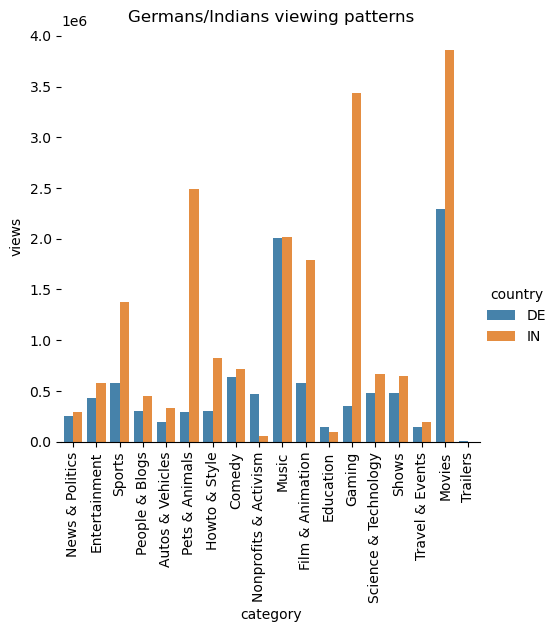

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.catplot(data = IN_DE_data, 
                kind = 'bar', 
                x = 'category', 
                y = 'views', 
                hue = 'country', 
                alpha = .9, 
                height = 5, 
                errorbar = None)

plt.title("Germans/Indians viewing patterns")

g.despine(left = True)
g.set_xticklabels(rotation = 90)

German viewers prefer to watch content about Education and Nonprofits & Activism. Especially by huge difference in "Nonprofits & Activism" views we can admit that Germans are mostly inspired self development and social activism.

On the other side, Indian viewers interested more in categories such as Gaming, Film & Animation, Pets & Animals, Movies, Sports etc. 

And YouTube platform for Indians is used as a source of spectacular content.

#### Ratios between views / likes / dislikes for different categories / countries

In [21]:
ratios = all_data.groupby(['country', 'category']).\
    agg({'views': 'sum', 'likes': 'sum', 'dislikes':'sum'})
ratios.head()

views      likes  dislikes
country category                                         
CA      Autos & Vehicles   119562221    3280828    113746
        Comedy            1700112283   85209714   2420559
        Education          271530103    9612006    384975
        Entertainment     6038865759  152755591   9110085
        Film & Animation  1134592939   27284332   1169308

In [22]:
ratios['views/likes_ratio'] = ratios['likes'] / ratios['views']
ratios['views/dislikes_ratio'] = ratios['dislikes'] / ratios['views']

In [23]:
ratios.reset_index(inplace = True)

In [24]:
views_likes_ratios_pivot = ratios.pivot(index = 'country', 
                                  columns = 'category', 
                                  values = 'views/likes_ratio')
views_dislikes_ratios_pivot = ratios.pivot(index = 'country', 
                                           columns = 'category', 
                                           values = 'views/dislikes_ratio')

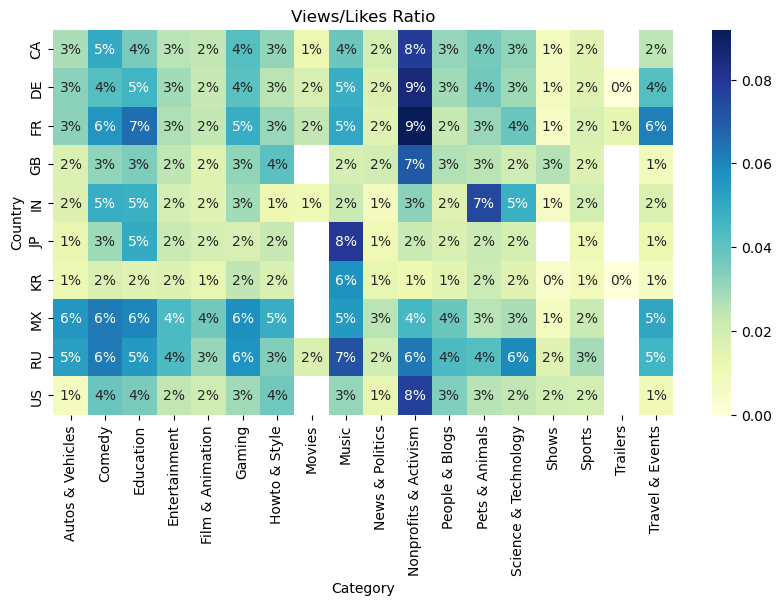

In [25]:
plt.figure(figsize = (10,5))
sns.heatmap(data = views_likes_ratios_pivot, 
            annot = True, 
            cmap = "YlGnBu", 
            fmt = ".0%")
plt.title("Views/Likes Ratio")
plt.xlabel("Category")
plt.ylabel("Country")
plt.show()

- **Views/Likes Ratio:** 

The most liked category in most of the countries represented is "Nonprofits & Activism". Also, "Music", "Comedy" and "Education" has the biggest "views/likes ratio". 
What about countries, Russian and Mexican viewers highly likely will click the like button in most of the categories.

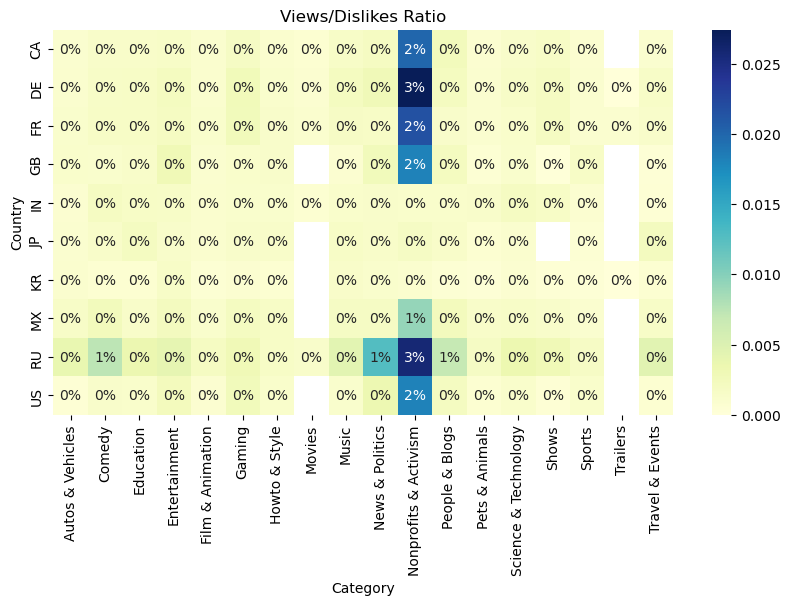

In [26]:
plt.figure(figsize = (10, 5))
sns.heatmap(data = views_dislikes_ratios_pivot, 
            annot = True, 
            cmap = "YlGnBu", 
            fmt = ".0%")
plt.title("Views/Dislikes Ratio")
plt.xlabel("Category")
plt.ylabel("Country")
plt.show()

- **Views/Dislikes Ratio:**

This indicator is times less than the previous. The most disliked category is "Nonprofits & Activism", that says that this category is very vulnerable in terms of peoples beliefs and may involve conflicts in society.
Also, Russian viewers are the most straightforward and will vote with dislike more often than others.

#### Сhannels that are popular in most countries

In [27]:
channel_views = pd.DataFrame(all_data.groupby(['country', 'channel_title'])['views'].sum().reset_index())
channel_views.head()

,country,channel_title,views
0,CA,#AndresSTyle,520401
1,CA,#Mind Warehouse,15149328
2,CA,#SeekingTheTruth,119011
3,CA,* Martyna *,44973
4,CA,- æ¬¢è¿è®¢é -æµæ±å«è§ãå¥è·å§ãå®...,19152926


In [28]:
channels_popularity = channel_views.sort_values(['country', 'views'], ascending = [True, False])
channels_popularity['rank'] = channels_popularity.groupby('country')['views'].rank(ascending = False)

In [29]:
channels_popularity.head()

,country,channel_title,views,rank
3599,CA,T-Series,342015089,1.0
2333,CA,MLG Highlights,199094694,2.0
1099,CA,Dude Perfect,196804885,3.0
2417,CA,Marvel Entertainment,192641384,4.0
2948,CA,PewDiePie,183430917,5.0


In [30]:
channels_popularity = channels_popularity[channels_popularity['rank'] <= 10]

In [31]:
popular_channels = pd.DataFrame(channels_popularity['channel_title'].value_counts()).head(10)
popular_channels

,count
channel_title,
ibighit,9
Marvel Entertainment,8
Dude Perfect,7
PewDiePie,7
YouTube Spotlight,6
MLG Highlights,5
5-Minute Crafts,4
The Late Show with Stephen Colbert,4
Ed Sheeran,3


In [32]:
popular_channels_list = popular_channels.index.values.tolist()

In [33]:
popular_channels_info = channel_views[channel_views['channel_title'].isin(popular_channels_list)].\
                        groupby('channel_title')['views'].sum().reset_index()
popular_channels_info = popular_channels_info.sort_values(['views'], ascending = False)
popular_channels_info = popular_channels_info.set_index('channel_title')

**Channels that are popular in most countries**

In [34]:
popular_channels_info

,views
channel_title,
ibighit,1590170234
Marvel Entertainment,1480915768
YouTube Spotlight,1070604343
Dude Perfect,1062968677
PewDiePie,1011011576
Ed Sheeran,955853396
ChildishGambinoVEVO,870769400
5-Minute Crafts,747973655
MLG Highlights,687026968
